In [2]:
import pandas as pd
import numpy as np 
import seaborn as sns
import filecmp

# Data Retrival and Preprocessing

### Read aggression data

In [3]:
agg_ant = pd.read_csv('C:\\Users\\jeffrey.lai\\Desktop\\test\\aggression_annotations.tsv', sep='\t' )

### Show Records for aggression data

In [4]:
agg_ant.shape

(1365217, 4)

In [5]:
agg_ant_cmt = pd.read_csv('C:\\Users\\jeffrey.lai\\Desktop\\test\\aggression_annotated_comments.tsv', sep='\t' )

In [6]:
agg_demo = pd.read_csv('C:\\Users\\jeffrey.lai\\Desktop\\test\\aggression_worker_demographics.tsv', sep='\t' )

### Join aggression_annotations with aggression_annotated_comments

In [7]:
agg_ant_agg_cmt = pd.merge(agg_ant, agg_ant_cmt, how='inner', on=['rev_id', 'rev_id'])

In [8]:
aggresive_df = pd.merge(agg_ant_agg_cmt,agg_demo, how= 'left',on=['worker_id','worker_id'])

# Analysis and Results

## How does gender drive different labeling behavior in the comments 

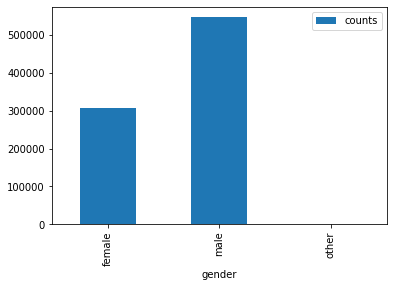

In [24]:
gx = (aggresive_df.groupby(['gender']).size()).reset_index(name='counts').plot.bar(x='gender',y='counts')

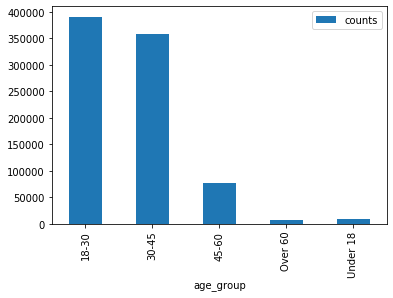

In [26]:
gx = (aggresive_df.groupby(['age_group']).size()).reset_index(name='counts').plot.bar(x='age_group',y='counts')

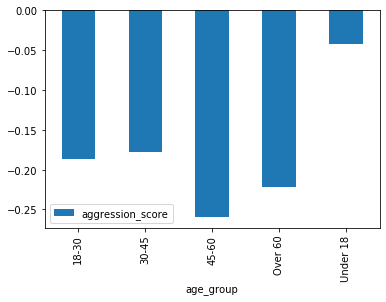

In [27]:
aggresive_df[aggresive_df['age_group'] != 'other'].groupby(['age_group']).agg({"aggression_score":"mean"}).plot.bar()

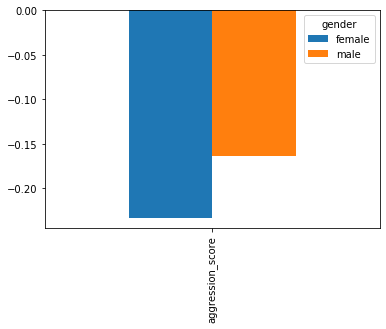

In [28]:
aggresive_df[aggresive_df['gender'] != 'other'].groupby(['gender']).agg({"aggression_score":"mean"}).T.plot.bar()